<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<H1 align='center'> Búsqueda de Soluciones </H1>

<H3> INF-285 Computación Científica </H3>
<H3> Autor: Francisco Andrades</H3>

Lenguaje: Python

Temas:

    - Bisección 
    - Punto Fijo
<hr style="height:2px;border:none"/>

### Polinomios de Legendre
Dada la función compuesta $f$
\begin{equation}
f_{n,m}(x) = L_n(C_m(x)),
\end{equation}
donde $L_n$ es conocido como el polinomio de Legendre de grado $n$ definido de la siguiente forma:
\begin{equation}
L_{n}(x)=\frac{1}{2^{n}} \sum_{k=0}^{n}\left(\begin{array}{l}
n \\
k
\end{array}\right)^{2}(x-1)^{n-k}(x+1)^{k},
\end{equation}
y $C_m$ es el polinomio de Chebyshev
\begin{equation}
C_m(x) = \cos(m \cdot \arccos(x)).
\end{equation}

Utilizando el método de Bisección y Punto fijo se pide obtener la raíz de $f$ más cercana a $0.5$ dado un valor de $m$ y $n$



*Hint: Las raíces de Legendre son conocidas*



#### Resolución

##### Construir el polinomio

El primer paso será construir la función compuesta $f$
\begin{equation}
f_{n,m}(x) = L_n(C_m(x))
\end{equation}

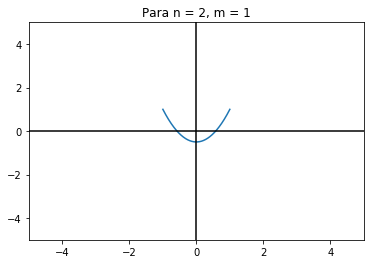

In [4]:

"""Importante, inicialmente construí la función utilizando las herramientas que 
entrega np (np.legendre(), np.chevit()), sin embargo esta implementación tenía problemas para n y m lo suficientemente grandes
por lo que decidí implementarlo yo mismo.
"""
def construir_polinomio(n,m,x):
    numero = (1/2**n)
    sum = 0
    for k in range(n+1):
        sum += (scipy.special.binom(n,k)**2)*((np.cos(m*np.arccos(x))-1)**(n-k))*((np.cos(m*np.arccos(x))+1)**k)
    return numero*sum

def f(n,m):
    r = lambda x: construir_polinomio(n,m,x)
    return r

f1 = f(2,1)
x = np.arange(-1, 1, 0.0001).tolist()

pyplot.plot(x, [f1(i) for i in x])
pyplot.title("Para n = 2, m = 1")
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
pyplot.show()

Se puede apreciar que tanto el dominio como el recorrido de la función pertenecen al intervalo *[-1,1]*.

Se graficará la función con distintos n y m, para poder hacer un análisis visual.

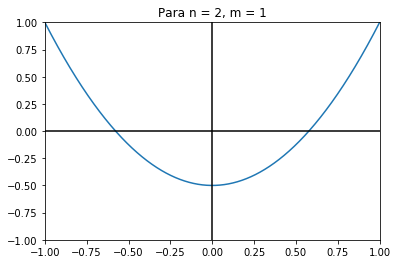

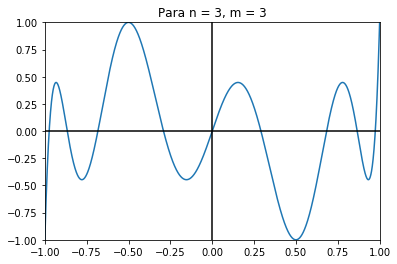

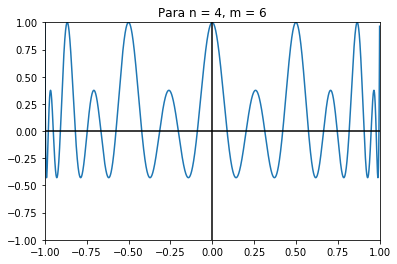

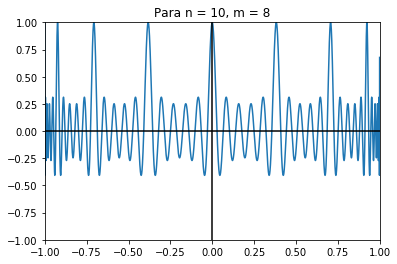

In [5]:

f1 = f(2,1)
f2 = f(3,3)
f3 = f(4,6)
f4 = f(10,8)
x = np.arange(-1, 1, 0.0001).tolist()

pyplot.plot(x, [f1(i) for i in x])
pyplot.title("Para n = 2, m = 1")
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(-1, 1)
pyplot.ylim(-1, 1)
pyplot.show()

pyplot.plot(x, [f2(i) for i in x])
pyplot.title("Para n = 3, m = 3")
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(-1, 1)
pyplot.ylim(-1, 1)
pyplot.show()

pyplot.plot(x, [f3(i) for i in x])
pyplot.title("Para n = 4, m = 6")
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(-1, 1)
pyplot.ylim(-1, 1)
pyplot.show()

pyplot.plot(x, [f4(i) for i in x])
pyplot.title("Para n = 10, m = 8")
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(-1, 1)
pyplot.ylim(-1, 1)
pyplot.show()



##### Inferencias importantes

Mediante un análisis puramente visual, se puede inferir:

    1. La función tiene n*m soluciones
    2. La función es simétrica o antisimétrica dependiendo de los valores de n y m
    3. De la conclusión anterior se puede inferir que existen la misma cantidad de soluciones en [0,1] y [-1,0]
    4. Las soluciones no son equidistantes, se van haciendo más frecuentes cuando x se acerca a 1 o -1
    5. Siempre va a existir una solución en el intervalo [0,1]
    
Debido a que el problema consiste en encontrar la solución más cercana a 0.5, se continuará trabajando sin considerar todas las soluciones para x < 0. 

##### Método de Bisección

El método de bisección tiene una complicación, requiere de un intervalo que contenga una única solución.

Si se intentara resolver el problema utilizando bisección sobre el intervalo *[0,1]*, por ejemplo, el método fallaría debido a la cantidad de soluciones presentes. Además, debido a la naturaleza del problema, deberemos encontrar un intervalo que contenga la solución (y solo ésta solución) más próxima a 0.5.

Pero, ¿cómo encontrar dicho intervalo?.

Ya se ha señalado que la cantidad de soluciones y el valor de éstas dependen de *n* y *m*, por lo que el intervalo de interés cambia si *n* o *m* cambian. Además las soluciones no son siquiera equidistantes, por lo que no existe una distancia *k* = xi - x(i+1) que permita inferir donde se encuentra el intervalo.

En esta tarea se propondrá un método que busca resolver este problema.

###### Un análisis estadístico
    

Volvamos a ver la función.
    

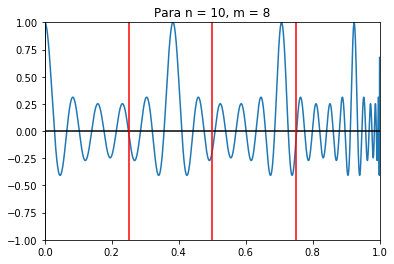

In [6]:
x = np.arange(0, 1, 0.0001).tolist()

pyplot.plot(x, [f4(i) for i in x])
pyplot.title("Para n = 10, m = 8")
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(0, 1)
pyplot.ylim(-1, 1)
pyplot.axvline(0.25, color="red")
pyplot.axvline(0.75, color="red")
pyplot.axvline(0.5, color="red")
pyplot.show()

Definamos el término Densidad de las soluciones Vs como:

\begin{equation}Vs = round(\frac{Cantidad\ de\ soluciones\ en\ un\ intervalo} {longitud\ del\ intervalo*10})\end{equation}

Para el intervalo *[0.25,0.5]*, *Vs = 2*.

Para el intervalo *[0.5,0.75]*, *Vs = 3*

Así, Vs aumenta a medida que aumenta x. 

Si bien las soluciones no son equidistantes, quizás Vs aumenta de forma regular.

Observemos como se comporta la función en el intervalo *[0,0.5].



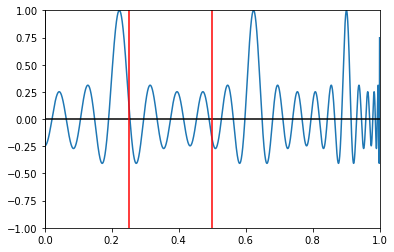

Vs para el intervalo [0,0.5]
2.0
Vs para el intervalo [0,1]
4.0
Vs para el intervalo [0,0.125]
2.0
Vs para el intervalo [0.125,0.25]
2.0
Vs para el intervalo [0.25,0.375]
2.0
Vs para el intervalo [0.375,0.5]
3.0


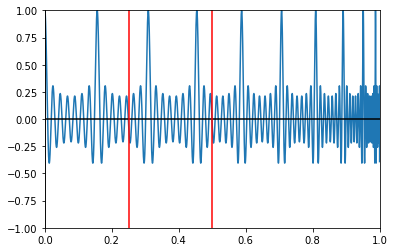

Vs para el intervalo [0,0.5]
9.0
Vs para el intervalo [0,1]
14.0
Vs para el intervalo [0,0.125]
9.0
Vs para el intervalo [0.125,0.25]
10.0
Vs para el intervalo [0.25,0.375]
9.0
Vs para el intervalo [0.375,0.5]
10.0


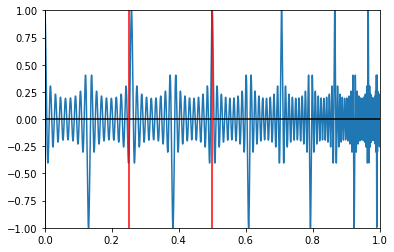

Vs para el intervalo [0,0.5]
14.0
Vs para el intervalo [0,1]
20.0
Vs para el intervalo [0,0.125]
14.0
Vs para el intervalo [0.125,0.25]
13.0
Vs para el intervalo [0.25,0.375]
14.0
Vs para el intervalo [0.375,0.5]
14.0


In [7]:
def analisis(f):
    pyplot.plot(x, [f(i) for i in x])
    pyplot.axhline(0, color="black")
    pyplot.axvline(0, color="black")
    # Limitar los valores de los ejes.
    pyplot.xlim(0, 1)
    pyplot.ylim(-1, 1)
    pyplot.axvline(0.25, color="red")
    pyplot.axvline(0.5, color="red")
    pyplot.show()
    
###probamos de forma experimental, cuantas soluciones hay en ciertos intervalos
    numero = 0
    lista_soluciones = []
    for i in x:
        if f(i) * numero < 0:
            lista_soluciones.append(i)
        numero = f(i)

    lista_025 = []
    lista_05 = []
    lista_125 = []
    lista_375 = []

    for i in lista_soluciones:
        if i < 0.25:
            lista_025.append(i)

    for i in lista_soluciones:
        if i > 0.25 and i < 0.5:
            lista_05.append(i)


    for i in lista_soluciones:
        if i < 0.125:
            lista_125.append(i)
        
    for i in lista_soluciones:
        if i > 0.25 and i < 0.375:
            lista_375.append(i)

    print("Vs para el intervalo [0,0.5]")
    print(np.round((len(lista_05)+len(lista_025))/5))

    print("Vs para el intervalo [0,1]")
    print(np.round((len(lista_soluciones)/10)))

    print("Vs para el intervalo [0,0.125]")
    print(np.round(len(lista_125)/1.25))

    print("Vs para el intervalo [0.125,0.25]")
    print(np.round((len(lista_025)-len(lista_125))/1.25))

    print("Vs para el intervalo [0.25,0.375]")
    print(np.round(len(lista_375)/1.25))

    print("Vs para el intervalo [0.375,0.5]")
    print(np.round((len(lista_05)-len(lista_375))/1.25))

analisis(f(10,7))
analisis(f(14,20))
analisis(f(17,24))

De este análisis se puede extraer lo siguiente para n y m cualquiera:

    1. Vs [0,0.5] / (Vs [0,1]*2) se acerca a 0.3333
    2. Vs [0,0.25] / Vs ([0,0.5]*2) se acerca a 0.48
    3. Vs [0.25,0.5] / Vs ([0,0.5]*2) se acerca a 0.52
    4. Vs se mantiene igual o aumenta en 1 para todo el intervalo [0,0.25]
    5. Vs se mantiene igual o aumenta en 1 para todo el intervalo [0.25,0.5]
    

**Sobre los puntos 1 ,2 y 3:**

 Para dos intervalos a y b que cumplen: 
 
 \begin{equation}
\frac{Vs(a)}{Vs(b)*2} = c,
\end{equation}  

en donde, 

\begin{equation}largo(b) = 2largo(a),
\end{equation} 

Con Ci = Cantidad de soluciones en i, tenemos :
       
\begin{equation} \frac{\frac{Ca}{largo(a)}}{ \frac{2Cb}{largo(b)}} = c,\end{equation}  
        
        
\begin{equation}\frac{Ca * 2largo(a)} {2Cb*largo(a)} = c\end{equation}
        
\begin{equation}\frac{Ca}{Cb} = c\end{equation}
    
Esto nos permite asegurar que,

\begin{equation}Ca = c*Cb\end{equation}

**Sobre los puntos 4 y 5:**

Para 2 intervalos a y b pertenecientes a [0,0.25] o [0.25,0.5], tenemos:
        
\begin{equation}Vs(a) = Vs(b),\end{equation} 
Lo que se traduce a
        
\begin{equation}\frac{Ca}{largo(a)} = \frac{Cb}{largo(b)}, \end{equation}
        
Finalmente,

\begin{equation}\frac{largo(a)}{largo(b)} = \frac{Ca}{Cb}\end{equation}
        
Esta igualdad demuestra que la cantidad de soluciones sigue una relación directa con el largo del intervalo.
        
La mitad de un intervalo, contiene la mitad de soluciones.
    

    El hecho de que Vs aumente en 1 en algunos casos, simplemente se debe a la existencia de n soluciones, con n impar. En este caso, uno de los intervalos va a contener una solución más. Sin embargo, la relación entre los Vs sigue siendo constante.
    
    Para n = 3: Una mitad tendrá dos soluciones.
        

Estas afirmaciones permiten buscar el intervalo de interés dentro de *[0,0.5]* conociendo sólo los valores de n y m.
Así, si n = 5 y m = 6: 
 
     En [0,1] existen 15 soluciones.
     En [0,0.5] existen 5 soluciones.
     En [0,0.25] existen 2 soluciones.
     En [0.25,0.5] existen 3 soluciones.
     ...
     En [0.4375,0.5] existe 1 solución (La más cercana a 0.5).

**Sobre el intervalo *[0.5,1]*:**

Lógicamente existen 2/3 de las soluciones.

En este intervalo Vs aumenta de forma más rápida, por lo que el análisis es un poco más complicado.

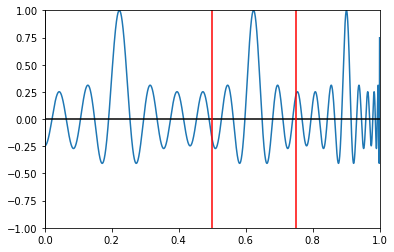

Vs para el intervalo [0.5,0.75]
3.0
Vs para el intervalo [0.5,1]
5.0
Vs para el intervalo [0.5,0.625]
2.4
Vs para el intervalo [0.5,0.5625]
2.0
Vs para el intervalo [0.5625,0.625]
3.0


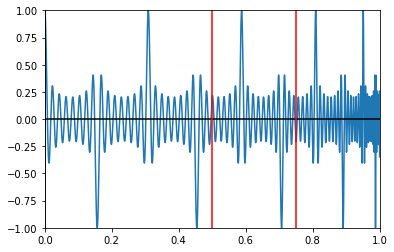

Vs para el intervalo [0.5,0.75]
12.0
Vs para el intervalo [0.5,1]
20.0
Vs para el intervalo [0.5,0.625]
11.2
Vs para el intervalo [0.5,0.5625]
11.0
Vs para el intervalo [0.5625,0.625]
11.0


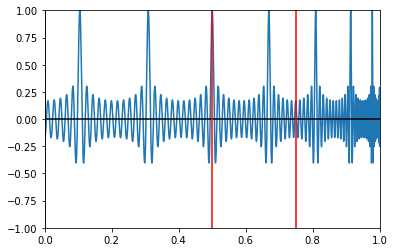

Vs para el intervalo [0.5,0.75]
14.0
Vs para el intervalo [0.5,1]
22.0
Vs para el intervalo [0.5,0.625]
12.8
Vs para el intervalo [0.5,0.5625]
13.0
Vs para el intervalo [0.5625,0.625]
13.0


In [8]:
def analisis2(f):
    
    pyplot.plot(x, [f(i) for i in x])
    pyplot.axhline(0, color="black")
    pyplot.axvline(0, color="black")
    # Limitar los valores de los ejes.
    pyplot.xlim(0, 1)
    pyplot.ylim(-1, 1)
    pyplot.axvline(0.75, color="red")
    pyplot.axvline(0.5, color="red")
    pyplot.show()

    numero = 0
    lista_soluciones = []
    for i in x:
        if f(i) * numero < 0:
            lista_soluciones.append(i)
        numero = f(i)
    
    lista_075 = []
    lista_1 = []
    lista_625 = []
    lista_875= []
    lista_9375 = []
    listax = []

    for i in lista_soluciones:
        if i > 0.5 and i < 0.75:
            lista_075.append(i)
        
    for i in lista_soluciones:
        if i > 0.75 and i < 1:
            lista_1.append(i)
        
    for i in lista_soluciones:
        if i > 0.5 and i < 0.625:
            lista_625.append(i)

    for i in lista_soluciones:
        if i > 0.75 and i < 0.875:
            lista_875.append(i)

    for i in lista_soluciones:
        if i > 0.875 and i < 0.9375:
            lista_9375.append(i)  
        
    for i in lista_soluciones:
        if i > 0.875 and i < 1:
            listax.append(i) 
            
    lista_5625 = []
    for i in lista_625:
        if i < 0.5625:
            lista_5625.append(i)

    print("Vs para el intervalo [0.5,0.75]")
    print(np.round(len(lista_075)/2.5))

    print("Vs para el intervalo [0.5,1]")
    print(np.round((len(lista_075)+len(lista_1))/5))
    
    print("Vs para el intervalo [0.5,0.625]")
    print(len(lista_625)/1.25)

    print("Vs para el intervalo [0.5,0.5625]")
    print(np.round(len(lista_5625)/0.625))
    
    print("Vs para el intervalo [0.5625,0.625]")
    print(np.round((len(lista_625)-len(lista_5625))/0.625))
    
analisis2(f(10,7))
analisis2(f(15,20))
analisis2(f(22,15))

Con el debido análisis de los Vs, se puede apreciar que:
    
    1. El intervalo [0.5,0.75] tiene 0.31 de las soluciones del intervalo [0.5,1]
    2. El intervalo [0.5,0.625] tiene 0.47 de las soluciones del intervalo [0.5,0.75]
    3. Dentro del intervalo [0.5,0.625] Vs se mantiene constante.
   
Para los intervalos [0.75,...] se va a asumir que 

\begin{equation}\frac{Vs(a)}{Vs(b)*2} = 0.3 \end{equation}

con
\begin{equation}largo(a) = \frac{largo(b)}{2} \end{equation}
    

Si bien estos son los intervalos donde Vs aumenta de forma más rápida, no nos va a interesar hacer una 
estimación demasiado precisa. Si es que m y n son altos, el comportamiento de la función en esos 
intervalos no es de nuestro interés, ya que siempre va a existir una solución mucho más cercana a 0.5, 
que es la que nos interesa.



Sumando estas consideraciones, ya tenemos toda la información necesaria para aislar la solución más cercana a 0.5 por la izquierda y por la derecha.

Procedemos a definir la función intervalo, que recibe n,m y retorna el intervalo con la solución más cercana por la izquierda y el intervalo con la solución más cercana por la derecha.

In [9]:
def intervalo(n,m):
    a = 0
    b = 1
    c = 0
    d = 1
    numero = 0
    if n*m == 1:
        return [0,0]
    
    if n*m == 2: #existe una unica solucion en el intervalo [0,1]
        return [a,b,0,0]
    
    if n*m ==3: #existe una unica solucion en el intervalo [0,1]
        return [a,b,0,0]
    
    numero = np.round((n*m)/6)
    if numero == 1:
        b = 0.5
    
    if numero >= 2:
        b = 0.5
        numero = np.round(0.52*numero)
        if numero == 1:
            a = 0.25
        if numero == 0:
            b = 0.25
        if numero >= 2:
            a = 0.25
        
        while(numero != 1):
            numero = np.round(0.5*numero)
            if numero == 1:
                a = a+(b-a)/2
                continue
            if numero == 0:
                b = b - (b-a)/2
            if numero >= 2:
                a = a+(b-a)/2
    
    
    numero = np.round((n*m)/3)
    if numero == 1:
        c = 0.5
    
    if numero >= 2:
        c = 0.5
        numero = np.round(0.31*numero)
        if numero == 1:
            d = 0.75 
        if numero == 0:
            c = 0.75
            marca = 1
        if numero >= 2:
            d = 0.75
            marca = 0
        
        while(numero != 1):
            
            if marca == 0:
                numero = np.round(0.47*numero)
            if marca == 1:
                numero = np.round(0.3*numero)
            
            if numero == 1:
                d = d - (d-c)/2 
                continue
            if numero == 0:
                c = c + (d-c)/2
            if numero >= 2:
                d = d - (d-c)/2 
    return [a, b , c, d] 


Una vez se tienen los intervalos, se puede ocupar Bisección para encontrar la solución.

In [10]:
def f_Biseccion(n,m,tol):
    
    root2 = 2
    a,b,c,d = intervalo(n,m)
    r = lambda x: construir_polinomio(n,m,x)
    
    
    fa = r(a)
    fb = r(b)
    if np.sign(fa*fb) >= 0:
        print('Numeros demasiado grandes!')
        return None
    
    while(b-a)/2 > tol:
        e = (a+b)/2.
        fe = r(e)
        if fe == 0:
            print(e)
            break
        elif np.sign(fa*fe) < 0:
            b = e
            fb = fe
        else:
            a = e
            fa = fe
        
    root1 = (a+b)/2.
    
    if c*d != 0:
        fc = r(c)
        fd = r(d)
        if np.sign(fc*fd) >= 0:
            print('Numeros demasiado grandes!')
            return None
    
        while(d-c)/2 > tol:
            e = (c+d)/2.
            fe = r(e)
            if fe == 0:
                print(e)
                break
            elif np.sign(fc*fe) < 0:
                d = e
                fd = fe
            else:
                c = e
                fc = fe
        
        root2 = (a+b)/2.
        
    if 0.5 - root1 < root2 - 0.5:
        return root1
    
    return root2

f_Biseccion(9,2,1e-8)

0.4396752044558525

###### Método Iteración de Punto Fijo

Para desarrollar este método, se trabajará con 0.5 como "Initial Guess".
Se contará con dos funciones, que recorrerán hacia la izquierda y hacia la derecha, para encontrar las dos raíces más cercanas a 0.5 por cada lado. Luego, se compararán estas raíces y se elegirá la más cercana a 0.5.

Primero se define una función para graficar:

In [11]:
def cobweb(x, g=None):
    min_x = np.amin(x)
    max_x = np.amax(x)
    
    pyplot.figure(figsize=(10,10))
    ax = pyplot.axes()
    pyplot.plot(np.array([min_x,max_x]),np.array([min_x,max_x]),'b-')
    for i in np.arange(x.size-1):
        delta_x = x[i+1]-x[i]
        head_length =  np.abs(delta_x)*0.04
        arrow_length = delta_x-np.sign(delta_x)*head_length
        ax.arrow(x[i], x[i], 0, arrow_length, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
        ax.arrow(x[i], x[i+1], arrow_length, 0, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
    
    if g!=None:
        y = np.linspace(min_x,max_x,1000)
        pyplot.plot(y,[g(i) for i in y],'r')
    
    pyplot.title('Cobweb diagram')
    pyplot.grid(True)
    pyplot.show()

Tenemos la expresión 

\begin{equation}  
   f_{n,m}(x) = 0,
\end{equation}

Para poder trabajar con FPI, debemos llegar a una expresión de la forma: 

\begin{equation}
    x = g_{n,m}(x),
\end{equation}

Existen muchos caminos para llegar a esta expresión, el más obvio sería:


\begin{equation}
    f_{n,m}(x) = 0 ,
\end{equation}


\begin{equation}
    f_{n,m}(x) + x = x ,
\end{equation}

Veamos como se comporta esta función para n y m cualquiera:

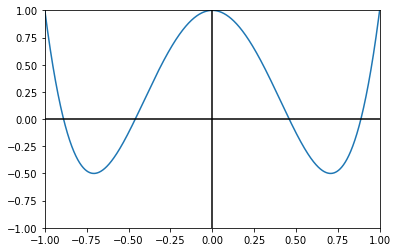

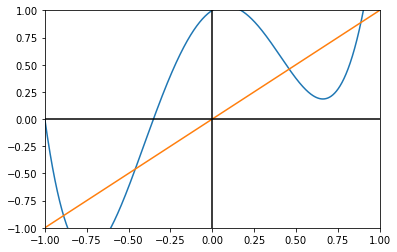

In [12]:
n = 2
m = 2
x = np.arange(-1, 1, 0.0001).tolist()
r = f(n,m)

funcion_2 = lambda x: r(x) + x


pyplot.plot(x, [r(i) for i in x])
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(-1, 1)
pyplot.ylim(-1, 1)
pyplot.show()

pyplot.plot(x, [funcion_2(i) for i in x])
pyplot.plot(x, [i for i in x])
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(-1, 1)
pyplot.ylim(-1, 1)
pyplot.show()

Se puede apreciar que la función cumple con su cometido, tiene como puntos fijos las soluciones de la primera función f(x). Probemos ahora FPI con esta función:

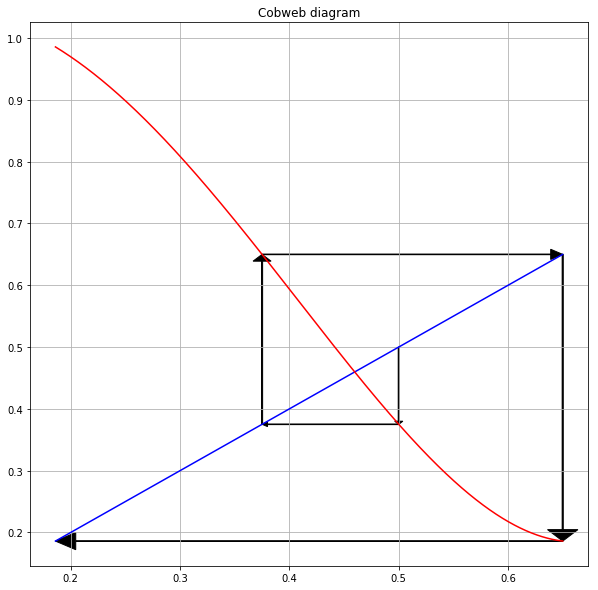

0.1860579979751263

In [13]:
def fpi_prueba(n,m, tol):
    x = []
    x.append(0.5)
    for i in range(3):
        x.append(funcion_2(x[i]))
    cobweb(np.array(x),funcion_2)
    return x[-1]
      
fpi_prueba(n,m,1e-8)

La función diverge.

¿Cuál es el problema?

Si bien la función cumple con los puntos fijos, sus pendientes son muy abruptas. Esto ocasiona que la función sea divergente para la mayoría de los puntos. Para solucionarlo, se propondrá una función mas "suave":

\begin{equation}  
   f(x) = 0,
\end{equation}

\begin{equation}  
   f(x) + x^3 + ax = x^3 + ax,
\end{equation}

\begin{equation}  
   f(x) + x^3 + ax = x(x^2 + a),
\end{equation}


\begin{equation}  
   \frac{f(x) + x^3 + ax}{x^2+a} = x,
\end{equation}


La ventaja de esta función es que se puede suavizar aumentando el valor de a.

Probemos FPI con a = 10:

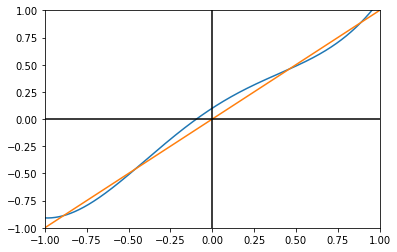

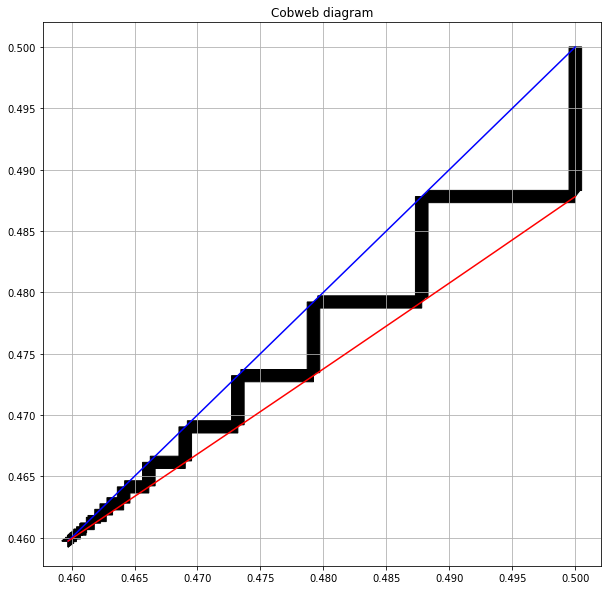

0.45972460364902534

In [14]:
funcion_2 = lambda x: (x**3 + 10*x + r(x)) / (x**2 + 10)

pyplot.plot(x, [funcion_2(i) for i in x])
pyplot.plot(x, [i for i in x])
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(-1, 1)
pyplot.ylim(-1, 1)
pyplot.show()


def fpi_prueba(n,m, tol):
    x = []
    x.append(0.5)

    
    for i in range(20):
        x.append(funcion_2(x[i]))
  
    cobweb(np.array(x),funcion_2)
    return x[-1]
      
fpi_prueba(n,m,1e-8)

La función es mucho más suave y se puede apreciar que converge en el punto fijo.

Sin embargo, aún existe un problema. Debido a la concavidad de la función, solo itera hacia la izquierda. Si hubiera una solución más cercana a 0.5 por la derecha no estaríamos realizando lo que se nos pide.

Es por esto que se planteará una segunda función de concavidad opuesta en todo intervalo para que itere de forma contraria: 

\begin{equation}  
   f(x) = 0,
\end{equation}

\begin{equation}  
   f(x) - x^3 - ax = -x^3 - ax,
\end{equation}

\begin{equation}  
    x^3 + ax - f(x) = x^3 + ax,
\end{equation}

\begin{equation}  
    x^3 + ax - f(x) = x(x^2 + a),
\end{equation}

\begin{equation}  
    \frac{x^3 + ax - f(x)}{x^2+a} = x,
\end{equation}

Con a = 10:

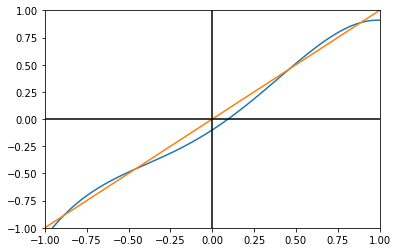

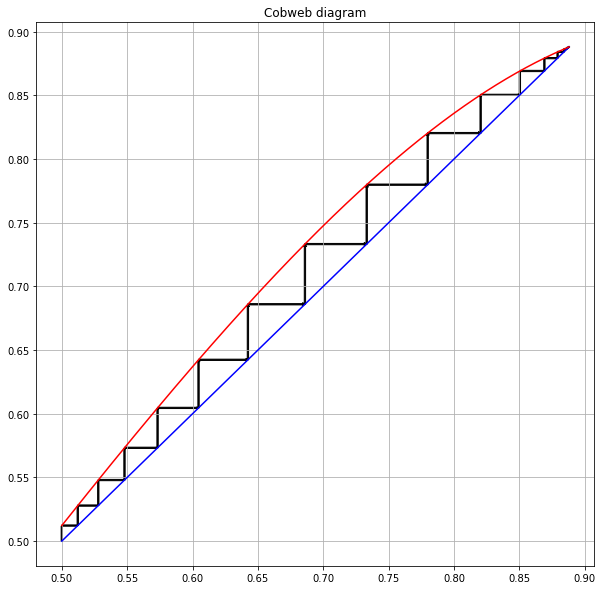

0.8880481942283281

In [15]:
funcion_3 = lambda x: (x**3 + 10*x - r(x)) / (x**2 + 10)

pyplot.plot(x, [funcion_3(i) for i in x])
pyplot.plot(x, [i for i in x])
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(-1, 1)
pyplot.ylim(-1, 1)
pyplot.show()

def fpi_prueba(n,m, tol):
    x = []
    x.append(0.5)

    
    for i in range(20):
        x.append(funcion_3(x[i]))
  
    cobweb(np.array(x),funcion_3)
    return x[-1]
    
    
fpi_prueba(n,m,1e-8)

La función converge al punto fijo que está en dirección contraria. Así, podemos definir un FPI que ocupe estas dos funciones para iterar en ambas direcciones.

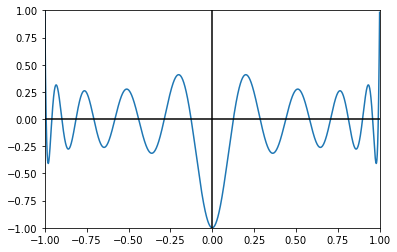

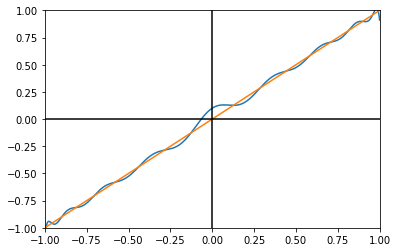

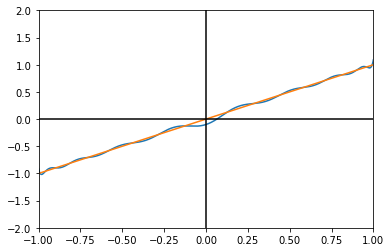

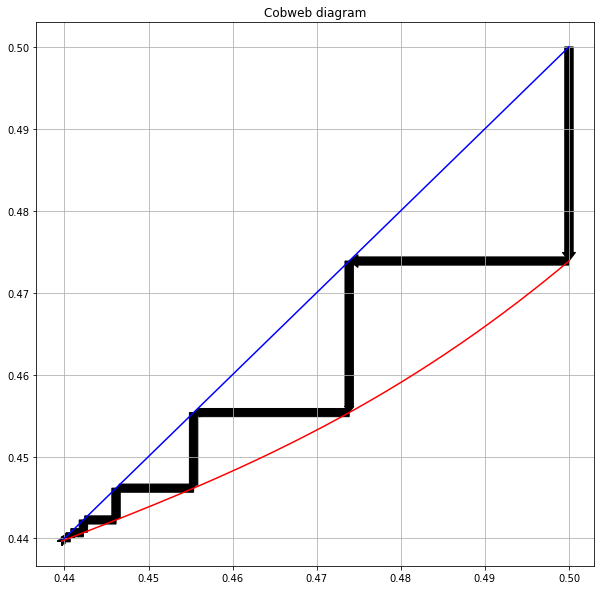

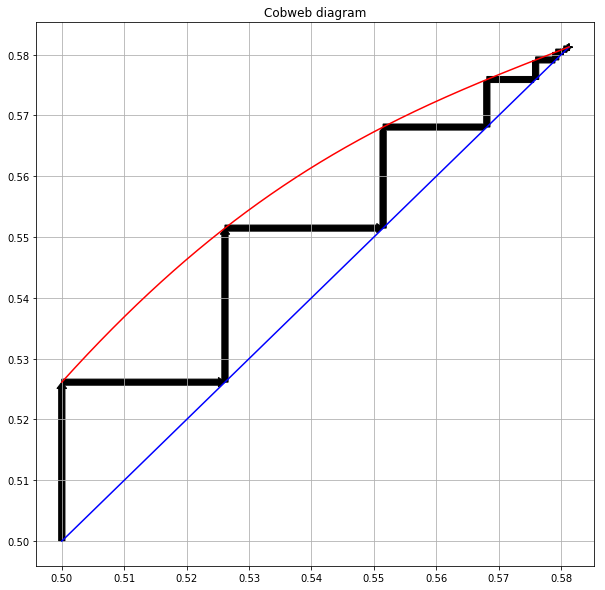

0.43967520825470374

In [16]:
n = 9
m = 2
r = f(n,m)
    
if n*m <= 50:
    a = 10
    
elif n*m <= 80:
    a = 15

elif n*m <= 100:
    a = 20

elif n*m <= 150:
    a = 50
    
elif n*m <= 300:
    a = 100


funcion_2 = lambda x: (x**3 + a*x - r(x)) / (x**2 + a)
funcion_3 = lambda x: (x**3 + a*x + r(x)) / (x**2 + a)


def f_FPI(n, m, tol):
    lista_left = []
    lista_right= []
    x0 = 0.5
    lista_left.append(x0)
    lista_right.append(x0)
    solucion_left = -2
    solucion_right = -2

    for i in range(1000):
        if i >= 1:
            if solucion_left == -2:
                if np.abs(lista_left[i] - lista_left[i-1]) <= tol:
                    solucion_left = lista_left[-1]
            
            if solucion_right == -2:
                if np.abs(lista_right[i] - lista_right[i-1]) <= tol:
                    solucion_right = lista_right[-1]
       
        if solucion_left == -2 and solucion_right == -2:
            if lista_left[-1] >= 1 or lista_left[-1] <= -1:
                if lista_right[-1] >= 1 or lista_right[-1] <= -1:
                    print("diverge")
                    break
                lista_right.append(funcion_2(lista_right[i]))
                continue
            
            if lista_right[-1] >= 1 or lista_right[-1] <= -1:
                
                if lista_left[-1] >= 1 or lista_left[-1] <= -1:
                    print("diverge")
                    break
                lista_left.append(funcion_3(lista_left[i]))
                continue
            
            lista_right.append(funcion_2(lista_right[i]))
            lista_left.append(funcion_3(lista_left[i]))
        
        if solucion_left == -2 and solucion_right != -2:
            if lista_left[-1] >= 1 or lista_left[-1] <= -1:
                break
            lista_left.append(funcion_3(lista_left[i]))
            
        if solucion_left != -2 and solucion_right == -2:
            if lista_right[-1] >= 1 or lista_right[-1] <= -1:
                break
            lista_right.append(funcion_2(lista_right[i]))
            
    if solucion_left == -2 and solucion_right == -2:
        print("diverge")
        return -1
    else:
        cobweb(np.array(lista_right),funcion_2)
        cobweb(np.array(lista_left),funcion_3)
        if abs(0.5 - solucion_left) < abs(0.5 - solucion_right):
            return solucion_left
        else:
            return solucion_right

pyplot.plot(x, [r(i) for i in x])
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(-1, 1)
pyplot.ylim(-1, 1)
pyplot.show()


pyplot.plot(x, [funcion_2(i) for i in x])
pyplot.plot(x, [i for i in x])
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(-1, 1)
pyplot.ylim(-1, 1)
pyplot.show()


pyplot.plot(x, [funcion_3(i) for i in x])
pyplot.plot(x, [i for i in x])
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(-1, 1)
pyplot.ylim(-2, 2)
pyplot.show()


f_FPI(n,m,1e-8)   

# Referencias

cobweb , f_Biseccion : https://github.com/tclaudioe/Scientific-Computing/blob/master/SC1/04_roots_of_1D_equations.ipynb